In [1]:
# import the libraries and modules that will be used for this project
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates: 'bool | Sequence[Hashable] | None' = None,
    infer_datetime_format: 'bool | lib.NoDefault' = <no_default>,
    keep_date_col: 'bool' =

In [3]:
# read the file
train_df = pd.read_csv(r'C:\Users\DELL\Desktop\train.csv')
test_df = pd.read_csv('~/Desktop/test.csv')
test_ids = test_df['PassengerId']
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df= train_df.drop(columns = 'PassengerId')
test_df = test_df.drop(columns = 'PassengerId')

In [5]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**EXPLORATORT DATA ANALYSIS**

In [12]:
train_df.shape,test_df.shape

((891, 11), (418, 10))

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [15]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
num_df = train_df.select_dtypes(include = ['float','int'])
cat_df  = train_df.select_dtypes(include  =  ['object','category'])

In [20]:
num_df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [21]:
cat_df

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [23]:
cat_df.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [25]:
num_df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

**Exploratory Data Analysis** **EDA**

In [27]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

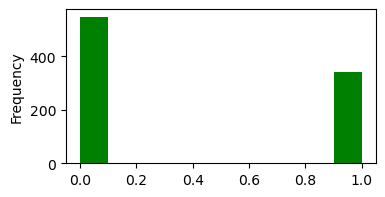

In [28]:
train_df['Survived'].plot(kind = 'hist',figsize = (4,2),color = ("g"))

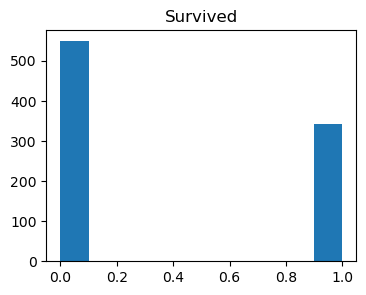

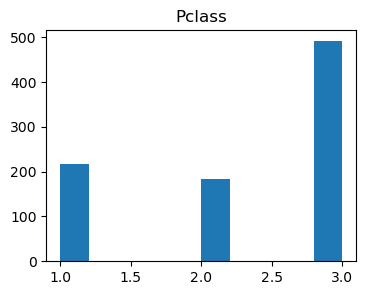

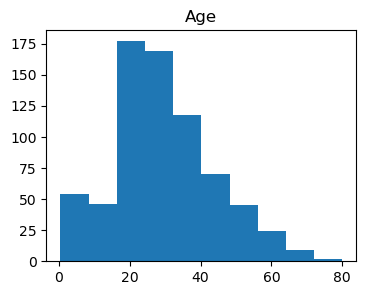

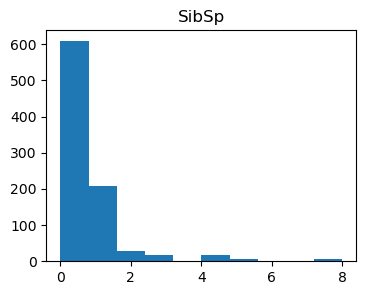

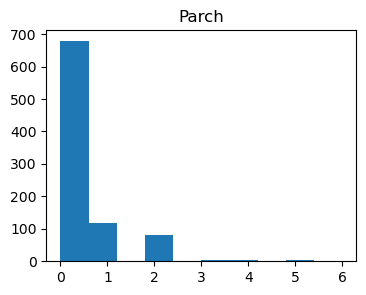

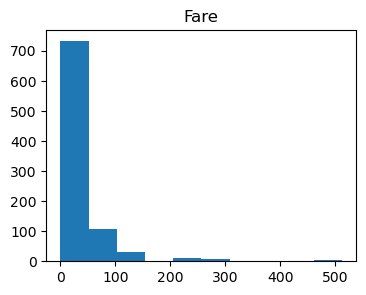

In [29]:
for i in num_df:
    plt.figure(figsize=(4,3))
    plt.hist(num_df[i])
    plt.title(i)
    plt.show()

In [30]:
train_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [31]:
print(num_df.corr())

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


<Axes: >

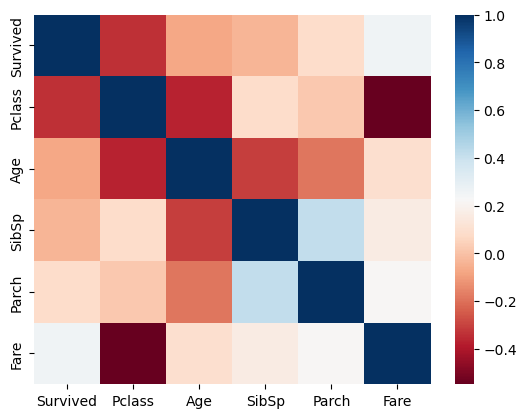

In [33]:
sns.heatmap(num_df.corr(),cmap = 'RdBu')

In [35]:
# compare survivsl rate across Age,Parch,SibSp, and fare
pd.pivot_table(train_df,index = 'Survived',values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


*handle cattegory*

In [38]:
# compare categories to survival
print(pd.pivot_table(train_df, index = 'Survived',columns = 'Sex',values='Ticket',aggfunc = 'count'))

Sex       female  male
Survived              
0             81   468
1            233   109


In [40]:
print(pd.pivot_table(train_df,index='Survived',columns ='Embarked' ,values = 'Ticket',aggfunc = 'count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [41]:
train_df.iloc[1:50,2]

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles Eugene
18    Vander Planke, Mrs. Julius (Emelia Maria V

**FEATURE ENGINEERING**

In [45]:
# Extract the title into a new column
def title_cleaned_name(data):
    data['Title'] = data['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
    # Create a new column for the clean name, removing the title
    data['Cleaned_Name'] = data['Name'].apply(lambda x: x.split(',')[0].strip() + ',' + ' '.join(x.split(',')[1].split('.')[1:]).strip())
    # slit cabin column into letters and numbers
    data[['Cabin_Letter', 'Cabin_Number']] = data['Cabin'].str.extract(r'([A-Za-z])(\d+)', expand=True)
    # Extract the ticket number (numeric part) directly
    data['Ticket_Number'] = data['Ticket'].str.split().str[-1]  # Get the last part (assumed to be the number)

    # Extract the ticket letter (text part) ONLY IF it exists
    data['Ticket_Letter'] = data['Ticket'].apply(lambda x: x.split()[0] if any(c.isalpha() for c in x.split()[0]) else None)
    # remover the characters in the ticket letter column
    data['Ticket_Letter'] = data['Ticket_Letter'].str.replace(r'[?/.\s]', '', regex=True)
    # drop irrelevant column like the name,cabin and ticket
    data = data.drop(columns = ['Name', 'Ticket', 'Cabin','Cleaned_Name'])
    return data

In [46]:
train_df = title_cleaned_name(train_df)
test_df = title_cleaned_name(test_df)

example age may by filled based on pclass and title, and then for object column or categorical column , handle it using group by function or method

In [48]:
train_df.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Embarked           2
Title              0
Cabin_Letter     691
Cabin_Number     691
Ticket_Number      0
Ticket_Letter    661
dtype: int64

In [49]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Letter,Cabin_Number,Ticket_Number,Ticket_Letter
0,0,3,male,22.0,1,0,7.2500,S,Mr,NaN,NaN,21171,A5
1,1,1,female,38.0,1,0,71.2833,C,Mrs,C,85,17599,PC
2,1,3,female,26.0,0,0,7.9250,S,Miss,NaN,NaN,3101282,STONO2
3,1,1,female,35.0,1,0,53.1000,S,Mrs,C,123,113803,None
4,0,3,male,35.0,0,0,8.0500,S,Mr,NaN,NaN,373450,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev,NaN,NaN,211536,None
887,1,1,female,19.0,0,0,30.0000,S,Miss,B,42,112053,None
888,0,3,female,NaN,1,2,23.4500,S,Miss,NaN,NaN,6607,WC
889,1,1,male,26.0,0,0,30.0000,C,Mr,C,148,111369,None


In [50]:
def missing_val(data):
    # fill missing age values based on title and pclass
    data['Age'] = data.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
    # fill the embarked columns by grouping
    data['Embarked'] = data.groupby('Pclass')['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))
    # handle missing ticket_letters
    data['Ticket_Letter'] = data.groupby(['Pclass',pd.qcut(data['Fare'],q=4)])['Ticket_Letter'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
    # handle missing ticket_letters
    data['Ticket_Letter'] = data.groupby(['Pclass',pd.qcut(data['Fare'],q=4)])['Ticket_Letter'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
    # grouped cabin letter by Fare
    data['Cabin_Letter'] = data.groupby(pd.qcut(train_df['Fare'], q=4))['Cabin_Letter'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
    # grouped cabin letter by Pclass
    data['Cabin_Letter'] = data.groupby('Pclass')['Cabin_Letter'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
    # grouped cabin number by Pclass
    data['Cabin_Number'] = data.groupby('Pclass')['Cabin_Number'].transform(lambda x: x.fillna(x.median()))
    # group ticket letter by pclass again
    data['Ticket_Letter'] = data.groupby('Pclass')['Ticket_Letter'].transform(lambda x: x.fillna(x.mode()))
    # handle missing ticket letter by filling with mean
    data['Ticket_Letter'] =  data['Ticket_Letter'].fillna(data['Ticket_Letter'].mode()[0])
    return data



# Save to CSV
**just leave it here for memory sake**
train_df.to_csv('my_data_for_missing_values_in_titanic_project.csv', index=False)

In [52]:
train_df = missing_val(train_df)
test_df = missing_val(test_df)

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked       891 non-null    object 
 8   Title          891 non-null    object 
 9   Cabin_Letter   891 non-null    object 
 10  Cabin_Number   891 non-null    object 
 11  Ticket_Number  891 non-null    object 
 12  Ticket_Letter  891 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 90.6+ KB


In [54]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Cabin_Letter', 'Cabin_Number', 'Ticket_Number',
       'Ticket_Letter'],
      dtype='object')

<Axes: >

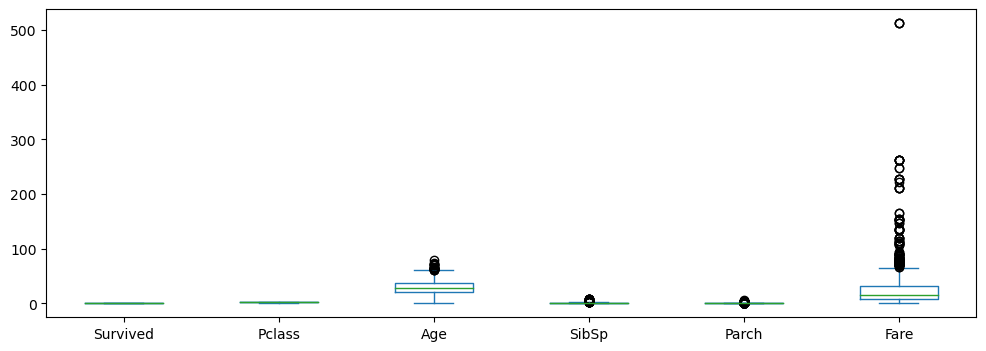

In [56]:
train_df.plot(kind='box',vert=True,figsize=(12,4))

**HANDLEING OUTLIERS USING INTERQUATILE RANGE METHOD**

In [58]:
def cap_outliers(data,ft):
    q1 = data[ft].quantile(0.25)
    q3 = data[ft].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    data[ft] = data[ft].clip(lower= lb, upper= ub)
    return data

In [59]:
for col in ['Age','SibSp','Parch','Fare']:
    train_df = cap_outliers(train_df,col)
    test_df =cap_outliers(test_df,col)

<Axes: >

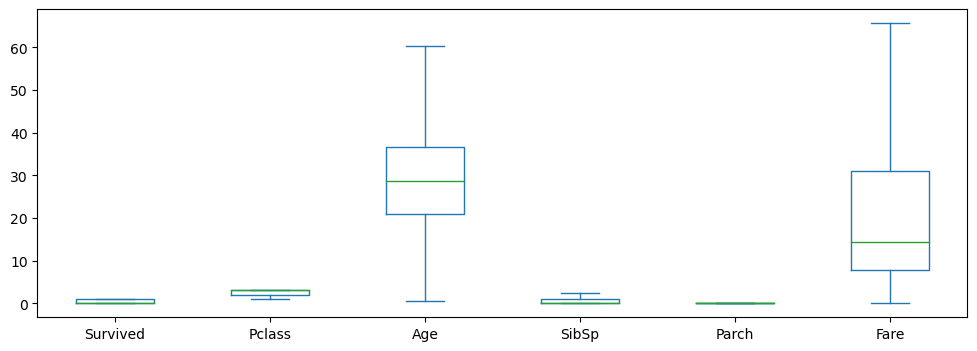

In [60]:
train_df.plot(kind = 'box', vert = True,figsize=(12,4))

<Axes: >

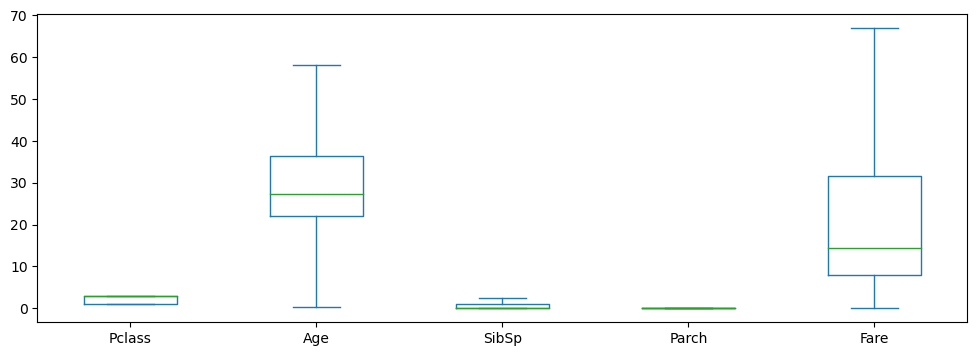

In [61]:
test_df.plot(kind = 'box', vert = True,figsize=(12,4))

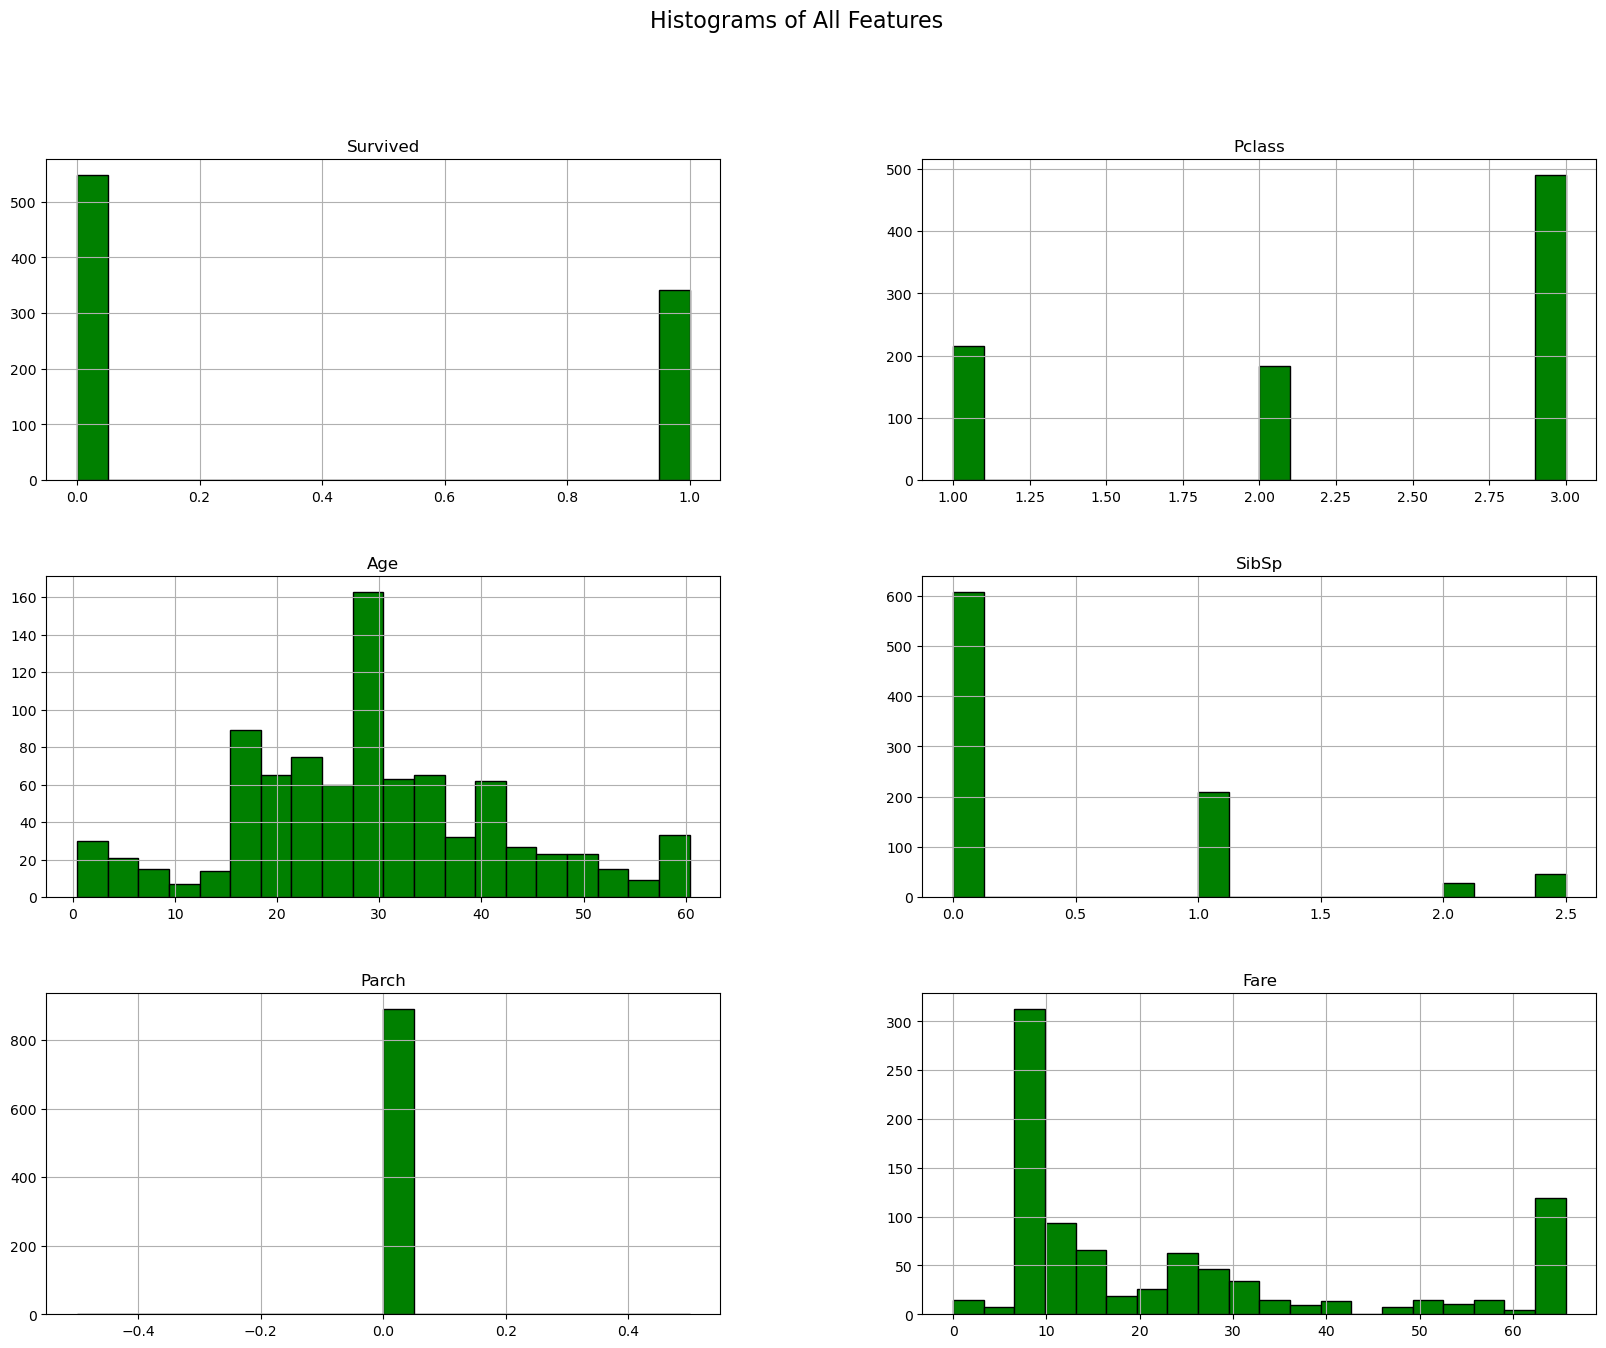

In [62]:
# Plotting histograms for all features
train_df.hist(bins=20, figsize=(20, 15), color='green', edgecolor='black')
plt.suptitle('Histograms of All Features', fontsize=16)
plt.show()

In [63]:
train_df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
Cabin_Letter     0
Cabin_Number     0
Ticket_Number    0
Ticket_Letter    0
dtype: int64

In [64]:
test_df.shape,train_df.shape

((418, 12), (891, 13))

In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    object 
 2   Age            417 non-null    float64
 3   SibSp          418 non-null    float64
 4   Parch          418 non-null    int64  
 5   Fare           417 non-null    float64
 6   Embarked       418 non-null    object 
 7   Title          418 non-null    object 
 8   Cabin_Letter   418 non-null    object 
 9   Cabin_Number   418 non-null    object 
 10  Ticket_Number  418 non-null    object 
 11  Ticket_Letter  418 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 39.3+ KB


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    float64
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked       891 non-null    object 
 8   Title          891 non-null    object 
 9   Cabin_Letter   891 non-null    object 
 10  Cabin_Number   891 non-null    object 
 11  Ticket_Number  891 non-null    object 
 12  Ticket_Letter  891 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 90.6+ KB


In [67]:
train_df[['Cabin_Number', 'Ticket_Number']] = train_df[['Cabin_Number', 'Ticket_Number']].apply(pd.to_numeric, errors='coerce')
test_df[['Cabin_Number', 'Ticket_Number']] = test_df[['Cabin_Number', 'Ticket_Number']].apply(pd.to_numeric, errors='coerce')

In [68]:
train_df = train_df.drop(columns = ['Ticket_Letter','Ticket_Number','Cabin_Letter'])
test_df = test_df.drop(columns =  ['Ticket_Letter','Ticket_Number','Cabin_Letter'])

In [69]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Number
0,0,3,male,22.000000,1.0,0,7.2500,S,Mr,50.5
1,1,1,female,38.000000,1.0,0,65.6344,C,Mrs,85.0
2,1,3,female,26.000000,0.0,0,7.9250,S,Miss,50.5
3,1,1,female,35.000000,1.0,0,53.1000,S,Mrs,123.0
4,0,3,male,35.000000,0.0,0,8.0500,S,Mr,50.5
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0.0,0,13.0000,S,Rev,33.0
887,1,1,female,19.000000,0.0,0,30.0000,S,Miss,42.0
888,0,3,female,16.123188,1.0,0,23.4500,S,Miss,50.5
889,1,1,male,26.000000,0.0,0,30.0000,C,Mr,148.0


In [70]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Number
0,3,male,34.500000,0.0,0,7.8292,Q,Mr,51.5
1,3,female,47.000000,1.0,0,7.0000,S,Mrs,51.5
2,2,male,58.250000,0.0,0,9.6875,Q,Mr,4.0
3,3,male,27.000000,0.0,0,8.6625,S,Mr,51.5
4,3,female,22.000000,1.0,0,12.2875,S,Mrs,51.5
...,...,...,...,...,...,...,...,...,...
413,3,male,27.198795,0.0,0,8.0500,S,Mr,51.5
414,1,female,39.000000,0.0,0,66.9063,C,Dona,105.0
415,3,male,38.500000,0.0,0,7.2500,S,Mr,51.5
416,3,male,27.198795,0.0,0,8.0500,S,Mr,51.5


In [71]:
num_df_new = train_df.select_dtypes(include = ['int' , 'float'])
cat_df_new = train_df.select_dtypes(include = ['object', 'category'])
cat_df_new

,Sex,Embarked,Title
0,male,S,Mr
1,female,C,Mrs
2,female,S,Miss
3,female,S,Mrs
4,male,S,Mr
...,...,...,...
886,male,S,Rev
887,female,S,Miss
888,female,S,Miss
889,male,C,Mr


In [72]:
cat_df_new.columns

Index(['Sex', 'Embarked', 'Title'], dtype='object')

In [76]:
 # convert categorical columns using labelencoder
for col in ['Sex', 'Embarked', 'Title',]:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.fit_transform(test_df[col])

In [78]:
train_df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Title           0
Cabin_Number    0
dtype: int64

In [79]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Number
0,0,3,1,22.000000,1.0,0,7.2500,2,11,50.5
1,1,1,0,38.000000,1.0,0,65.6344,0,12,85.0
2,1,3,0,26.000000,0.0,0,7.9250,2,8,50.5
3,1,1,0,35.000000,1.0,0,53.1000,2,12,123.0
4,0,3,1,35.000000,0.0,0,8.0500,2,11,50.5
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.0,0,13.0000,2,14,33.0
887,1,1,0,19.000000,0.0,0,30.0000,2,8,42.0
888,0,3,0,16.123188,1.0,0,23.4500,2,8,50.5
889,1,1,1,26.000000,0.0,0,30.0000,0,11,148.0


In [80]:
test_df.isnull().sum()

Pclass          0
Sex             0
Age             1
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
Cabin_Number    0
dtype: int64

In [82]:
num_df_new.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_Number
Survived,1.000000,-0.338481,-0.075333,0.031434,NaN,0.317430,-0.052928
Pclass,-0.338481,1.000000,-0.406990,0.023180,NaN,-0.715300,0.084619
Age,-0.075333,-0.406990,1.000000,-0.276688,NaN,0.167113,0.012819
SibSp,0.031434,0.023180,-0.276688,1.000000,NaN,0.349615,-0.008304
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.317430,-0.715300,0.167113,0.349615,NaN,1.000000,0.014651
Cabin_Number,-0.052928,0.084619,0.012819,-0.008304,NaN,0.014651,1.000000


In [84]:
cleaned_df = train_df

In [85]:
cleaned_df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Title           0
Cabin_Number    0
dtype: int64

In [87]:
test_df = test_df.fillna(test_df['Age'].mean())
test_df =  test_df.fillna(test_df['Fare'].mean())

In [88]:
test_df.isnull().sum()

Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Title           0
Cabin_Number    0
dtype: int64

In [89]:
# Define Target and Features
target = 'Survived'
X = cleaned_df.drop(target, axis=1)
y = cleaned_df[target]

In [90]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [92]:
# Data Split: Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [95]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [99]:
y_train

445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 623, dtype: int64

In [103]:
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state = 0,max_iter = 50).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy = accuracy_score(y_test,prediction)

C:\Users\DELL\anaconda3\envs\tfl\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
accuracy

0.7947761194029851

In [112]:
# Optional: Save the model
joblib.dump(clf, 'logistic_regression_new_model.pkl')
# Optional: Load the model later
# loaded_model = joblib.load('logistic_regression_new_model.pkl')

['logistic_regression_new_model.pkl']

** HANDLE TEST DATA**

In [115]:
test_df.shape

(418, 9)

In [116]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Sex           418 non-null    int32  
 2   Age           418 non-null    float64
 3   SibSp         418 non-null    float64
 4   Parch         418 non-null    int64  
 5   Fare          418 non-null    float64
 6   Embarked      418 non-null    int32  
 7   Title         418 non-null    int32  
 8   Cabin_Number  418 non-null    float64
dtypes: float64(4), int32(3), int64(2)
memory usage: 24.6 KB


In [151]:
# Generate predictions using your trained model
titanic_predictions_n = clf.predict(test_df)


In [155]:
titanic_predictions_n

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [157]:
df = pd.DataFrame({'PassengerId': test_ids.values,
                  'Survived': titanic_predictions_n})

In [159]:
df.to_csv('titanic_predictions_n.csv',index = False)

In [168]:
test_df.shape,titanic_predictions.shape

((418, 9), (418,))

In [170]:
test_ids.values

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [83]:
pd.read_csv?


Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates: 'bool | Sequence[Hashable] | None' = None,
    infer_datetime_format: 'bool | lib.NoDefault' = <no_default>,
    keep_date_col: 'bool' =